In [9]:
import numpy as np
from hyperopt import hp, tpe, fmin
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#single line bayesian optimization of polynomial function
best = fmin(fn = lambda x: np.poly1d([1, -2, -28, 28, 12, -26, 100])(x),
           space = hp.normal('x', 4.9, 0.5), algo= tpe.suggest,
            max_evals = 2000)

100%|██████████| 2000/2000 [00:15<00:00, 131.21trial/s, best loss: -4396.024079037525]


In [4]:
best

{'x': 4.878111664695495}

In [5]:
import numpy as np

def objective(x):
    """Objective function to minimize"""
    
    # Create the polynomial object
    f = np.poly1d([1, -2, -28, 28, 12, -26, 100])

    # Return the value of the polynomial
    return f(x) * 0.05

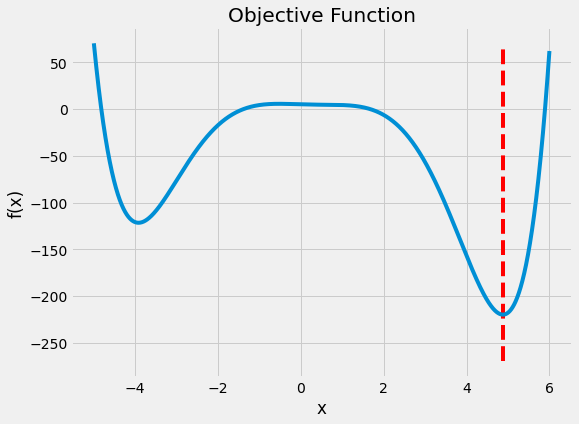

In [21]:
x = np.linspace(-5, 6, 10000)
y = objective(x)

miny = min(y)
minx = x[np.argmin(y)]

plt.figure(figsize= (8, 6))
plt.style.use('fivethirtyeight')
plt.title('Objective Function'); plt.xlabel('x'); plt.ylabel('f(x)')
plt.vlines(minx, min(y)-50, max(y), linestyles = '--', colors = 'r')
plt.plot(x, y)

In [18]:
np.argmin(y)

8979

## Domain

In [22]:
from hyperopt import hp

# Create the domain space
space  = hp.uniform('x', -5, 6)

(array([537., 511., 475., 476., 522., 455., 491., 525., 496., 458., 498.,
        531., 512., 501., 540., 485., 479., 505., 502., 501.]),
 array([-4.99910008, -4.44923198, -3.89936387, -3.34949577, -2.79962766,
        -2.24975956, -1.69989145, -1.15002335, -0.60015524, -0.05028714,
         0.49958097,  1.04944907,  1.59931718,  2.14918528,  2.69905339,
         3.24892149,  3.7987896 ,  4.3486577 ,  4.8985258 ,  5.44839391,
         5.99826201]),
 <BarContainer object of 20 artists>)

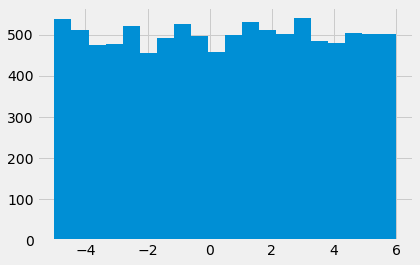

In [29]:
from hyperopt.pyll.stochastic import sample

samples = []
for _ in range(10000):
    samples.append(sample(space))
    
#histogram
plt.hist(samples, bins=20)


### Hyperparameter Optimization Algorithm

In [30]:
from hyperopt import rand, tpe

# create the algorithms
tpe_algo = tpe.suggest
rand_algo = rand.suggest

### History

In [31]:
from hyperopt import Trials

# create two trials objects
tpe_trials = Trials()
rand_trials = Trials()

In [32]:
tpe_trials

### Run the optimization

In [33]:
from hyperopt import fmin

# Run 2000 evals with the tpe algorithm
tpe_best = fmin(fn = objective, space = space, algo = tpe_algo, 
               trials= tpe_trials, max_evals = 2000, rstate=np.random.RandomState(50))

# Run 2000 evals with the random algorithm
rand_best = fmin(fn = objective, space = space, algo= rand_algo,
                trials = rand_trials, max_evals = 2000, rstate = np.random.RandomState(50))

print(tpe_best, rand_best)


100%|██████████| 2000/2000 [00:05<00:00, 392.20trial/s, best loss: -219.80116907646868]
{'x': 4.878481851906148} {'x': 4.877613189834774}


In [34]:
%%timeit -n 3
# Run 2000 evals with the tpe algorithm
best = fmin(fn = objective, space= space, algo = tpe_algo, max_evals=2000)

100%|██████████| 2000/2000 [00:20<00:00, 98.30trial/s, best loss: -219.8011983964082] 
18 s ± 718 ms per loop (mean ± std. dev. of 7 runs, 3 loops each)


In [36]:
%%timeit -n 3
# Run 2000 evals with the random algorithm
best = fmin(fn = objective, space = space, algo = rand_algo, max_evals = 2000)

100%|██████████| 2000/2000 [00:06<00:00, 332.19trial/s, best loss: -219.80103175056317]
5.55 s ± 323 ms per loop (mean ± std. dev. of 7 runs, 3 loops each)


In [40]:
len(tpe_trials.idxs_vals[0]['x'])

2000

# Results

In [41]:
tpe_results = pd.DataFrame({'loss': [ x['loss'] for x in tpe_trials.results],
                           'iteration' : tpe_trials.idxs_vals[0]['x'],
                           'x': tpe_trials.idxs_vals[1]['x']})

In [42]:
tpe_results.head(20)

,loss,iteration,x
0,36.210073,0,5.957885
1,-202.384052,1,4.470885
2,-75.519449,2,3.218963
3,5.543552,3,-0.515859
4,35.078011,4,-4.916832
5,5.027404,5,-0.845634
6,-5.263738,6,1.953339
7,-16.661503,7,-1.986542
8,4.450530,8,0.825648
9,-75.457577,9,3.218281


In [45]:
max(tpe_results.iteration)

1999